In [1]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1oLW2v3urYjbtHL8uA_dYRmnLv9r4jA3y' -O shows.csv


--2024-07-11 11:46:59--  https://docs.google.com/uc?export=download&id=1oLW2v3urYjbtHL8uA_dYRmnLv9r4jA3y
Resolving docs.google.com (docs.google.com)... 172.217.194.102, 172.217.194.139, 172.217.194.101, ...
Connecting to docs.google.com (docs.google.com)|172.217.194.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1oLW2v3urYjbtHL8uA_dYRmnLv9r4jA3y&export=download [following]
--2024-07-11 11:46:59--  https://drive.usercontent.google.com/download?id=1oLW2v3urYjbtHL8uA_dYRmnLv9r4jA3y&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.175.132
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.175.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 231 [application/octet-stream]
Saving to: ‘shows.csv’

shows.csv           100%[===================>]     231  --.-KB/s    in 0s      

2024-07-11 11:47:00 (1

In [1]:
import pandas
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

df = pandas.read_csv("shows.csv")

print(df)

    Age  Experience  Rank Nationality   Go
0    36          10     9          UK   NO
1    42          12     4         USA   NO
2    23           4     6           N   NO
3    52           4     4         USA   NO
4    43          21     8         USA  YES
5    44          14     5          UK   NO
6    66           3     7           N  YES
7    35          14     9          UK  YES
8    52          13     7           N  YES
9    35           5     9           N  YES
10   24           3     5         USA   NO
11   18           3     7          UK  YES
12   45           9     9          UK  YES


Change string values into numerical values:
- convert the values 'UK' to 0, 'USA' to 1, and 'N' to 2.

- convert the non numerical columns 'Nationality' and 'Go' into numerical values.

In [2]:
import pandas
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

df = pandas.read_csv("shows.csv")

d = {'UK': 0, 'USA': 1, 'N': 2}
df['Nationality'] = df['Nationality'].map(d)
d = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)

print(df)

    Age  Experience  Rank  Nationality  Go
0    36          10     9            0   0
1    42          12     4            1   0
2    23           4     6            2   0
3    52           4     4            1   0
4    43          21     8            1   1
5    44          14     5            0   0
6    66           3     7            2   1
7    35          14     9            0   1
8    52          13     7            2   1
9    35           5     9            2   1
10   24           3     5            1   0
11   18           3     7            0   1
12   45           9     9            0   1


separate the feature columns from the target column

In [3]:
import pandas
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

df = pandas.read_csv("shows.csv")

d = {'UK': 0, 'USA': 1, 'N': 2}
df['Nationality'] = df['Nationality'].map(d)
d = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)

features = ['Age', 'Experience', 'Rank', 'Nationality']

X = df[features]
y = df['Go']

print(X)
print(y)

    Age  Experience  Rank  Nationality
0    36          10     9            0
1    42          12     4            1
2    23           4     6            2
3    52           4     4            1
4    43          21     8            1
5    44          14     5            0
6    66           3     7            2
7    35          14     9            0
8    52          13     7            2
9    35           5     9            2
10   24           3     5            1
11   18           3     7            0
12   45           9     9            0
0     0
1     0
2     0
3     0
4     1
5     0
6     1
7     1
8     1
9     1
10    0
11    1
12    1
Name: Go, dtype: int64


Create Decision Tree

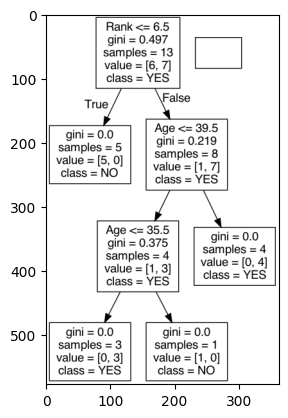

In [4]:
import pandas
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

df = pandas.read_csv("shows.csv")

d = {'UK': 0, 'USA': 1, 'N': 2}
df['Nationality'] = df['Nationality'].map(d)
d = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)

features = ['Age', 'Experience', 'Rank', 'Nationality']

X = df[features]
y = df['Go']

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)

class_names = ['NO', 'YES']
data = tree.export_graphviz(dtree, out_file=None, feature_names=features, class_names=class_names)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

img = pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()


Display Tree

In [5]:
from sklearn.tree import export_text
r = export_text(dtree, feature_names=features)
print(r)

|--- Rank <= 6.50
|   |--- class: 0
|--- Rank >  6.50
|   |--- Age <= 39.50
|   |   |--- Age <= 35.50
|   |   |   |--- class: 1
|   |   |--- Age >  35.50
|   |   |   |--- class: 0
|   |--- Age >  39.50
|   |   |--- class: 1



Predict Value

In [6]:
#features = ['Age', 'Experience', 'Rank', 'Nationality']
print(dtree.predict([[40, 10, 6, 1]]))
print(dtree.predict([[40, 8, 7, 0]]))

print("[1] means 'GO'")
print("[0] means 'NO'")

[0]
[1]
[1] means 'GO'
[0] means 'NO'


/Users/sirisuk/anaconda3/envs/nlp_py3.9/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/sirisuk/anaconda3/envs/nlp_py3.9/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Model Evaluation

In [7]:
import pandas
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

df = pandas.read_csv("shows.csv")

d = {'UK': 0, 'USA': 1, 'N': 2}
df['Nationality'] = df['Nationality'].map(d)
d = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)

features = ['Age', 'Experience', 'Rank', 'Nationality']
X = df[features]
y = df['Go']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

y_predict = dtree.predict(X_test)
print(X_test)
print(y_predict)

acc = accuracy_score(y_test, y_predict)
print("accuracy score: ", acc)
cm = confusion_matrix(y_test, y_predict)
print(cm)
print(classification_report(y_test, y_predict, target_names=['NO', 'YES']))

   Age  Experience  Rank  Nationality
6   66           3     7            2
3   52           4     4            1
8   52          13     7            2
[1 0 1]
accuracy score:  1.0
[[1 0]
 [0 2]]
              precision    recall  f1-score   support

          NO       1.00      1.00      1.00         1
         YES       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



Seaborn Heat Map

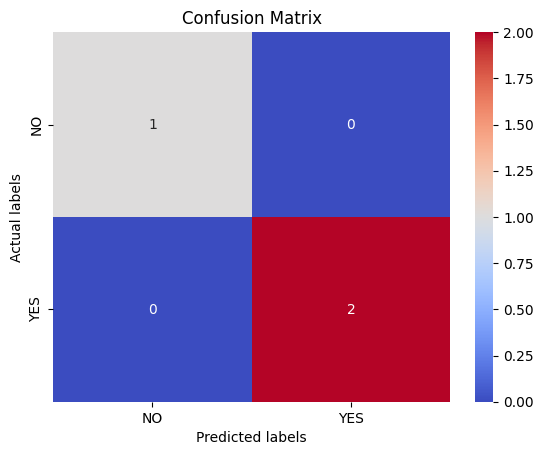

In [8]:
import pandas
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

df = pandas.read_csv("shows.csv")

d = {'UK': 0, 'USA': 1, 'N': 2}
df['Nationality'] = df['Nationality'].map(d)
d = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)

features = ['Age', 'Experience', 'Rank', 'Nationality']
X = df[features]
y = df['Go']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

y_predict = dtree.predict(X_test)

cm = confusion_matrix(y_test, y_predict)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap="coolwarm")

ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted labels")
ax.set_ylabel("Actual labels")
ax.xaxis.set_ticklabels(['NO', 'YES'])
ax.yaxis.set_ticklabels(['NO', 'YES'])
plt.show()

Cross validation

In [10]:
import pandas
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

df = pandas.read_csv("shows.csv")

d = {'UK': 0, 'USA': 1, 'N': 2}
df['Nationality'] = df['Nationality'].map(d)
d = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)

features = ['Age', 'Experience', 'Rank', 'Nationality']
X = df[features]
y = df['Go']

dtree = DecisionTreeClassifier()
# k-fold (k=cv) loop k round
cvs = cross_val_score(dtree, X, y, cv=5)
print('cross val scores', cvs.round(3))
print('mean = ', cvs.mean().round(4) * 100)

cross val scores [0.667 0.667 1.    1.    0.5  ]
mean =  76.67


Exercise: Use Decision Tree to classify dataset Iris

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [13]:
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df[feature_cols]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
y = df.species
y.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [17]:
import pandas
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


dtree = DecisionTreeClassifier()
cvs = cross_val_score(dtree, X, y, cv=10)
print('cross val scores', cvs.round(3))
print('mean = ', cvs.mean().round(4) * 100)

cross val scores [1.    0.933 1.    0.933 0.933 0.867 0.933 0.933 1.    1.   ]
mean =  95.33
